## Simple demonstration of calculating segmentation metrics

*NOTE(arl)*: the metrics here are calculated as follows in batch mode:
+ `n_true_labels` is the sum of all true labels, etc
+ `IoU` is the mean IoU of all found objects
+ `Jaccard` is the Jaccard index over all found objects
+ `localization_error` is the mean error for all found objects
+ `pixel_identity` is the per image pixel identity

In [1]:
import umetrix

import numpy as np
from skimage.io import imread

In [2]:
# load a ground truth - prediction image pair
p = "../tests/data/unet.tif"
s = imread(p)
y_true = s[-2, ...]
y_pred = s[-1, ...]

In [3]:
result = umetrix.calculate(y_true, y_pred)

Metric,
n_true_labels,13
n_pred_labels,14
n_true_positives,12
n_false_positives,2
n_false_negatives,1
IoU,0.807
Jaccard,0.800
pixel_identity,0.959
localization_error,15.524

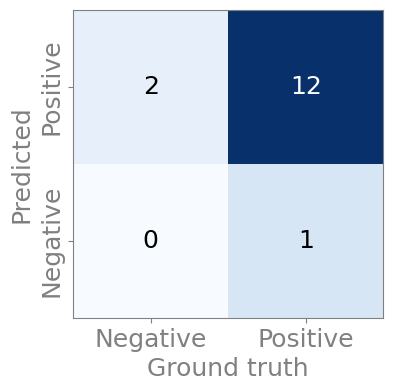

In [4]:
result

## visualize the metrics

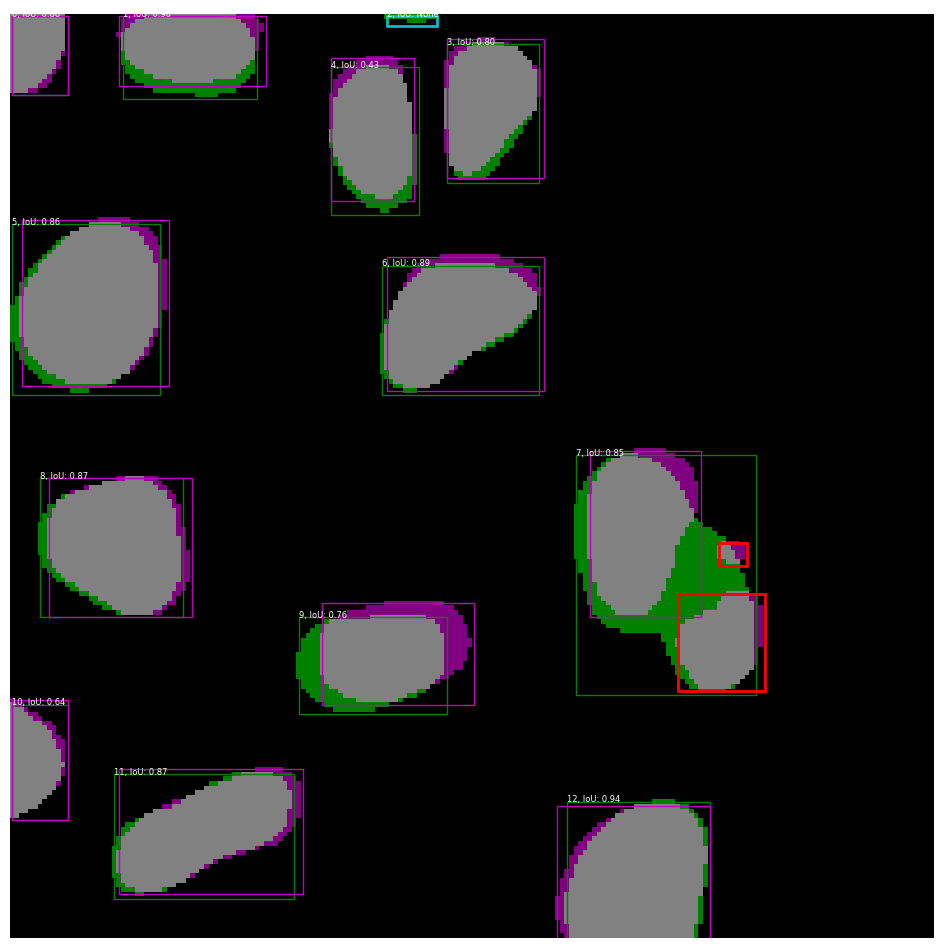

In [5]:
result.plot()

### now perform the calculation with strict matching only

Metric,
n_true_labels,13
n_pred_labels,14
n_true_positives,11
n_false_positives,3
n_false_negatives,2
IoU,0.841
Jaccard,0.688
pixel_identity,0.959
localization_error,5.305

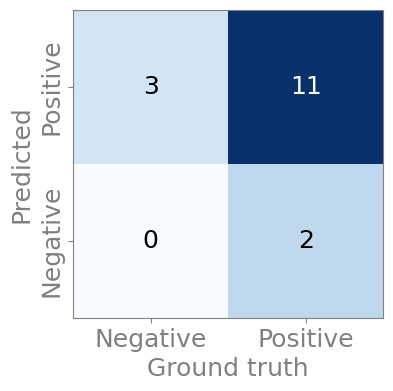

In [6]:
result = umetrix.calculate(y_true, y_pred, strict=True, iou_threshold=0.5)
result

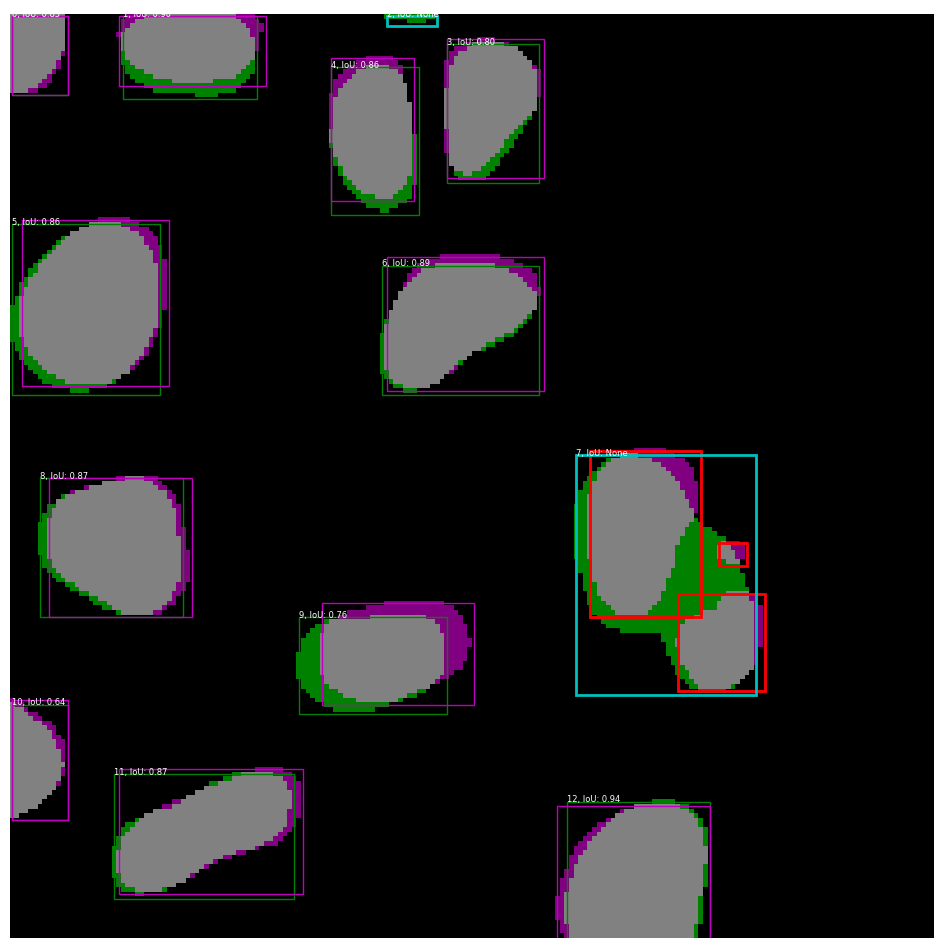

In [7]:
result.plot()